In [1]:
import pandas as pd
from datetime import datetime
import collections

In [2]:
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, FactorRange, Div, HoverTool, FuncTickFormatter
from bokeh.resources import INLINE
from bokeh.layouts import gridplot
from bokeh.transform import factor_cmap

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
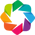

In [3]:
import holoviews as hv
hv.extension('bokeh')
import panel as pn
pn.extension()
import hvplot.pandas

In [4]:
def set_external_graph_prop(p):
    p.yaxis.formatter = FuncTickFormatter(code=""" return (Math.floor(tick) * 1e-3).toFixed(1) + "K" """)
    p.y_range.start = 0
    p.toolbar_location = None
    p.margin = 5
    p.background_fill_color = 'white'
    p.border_fill_color = 'white'
    p.width = 300
    p.height = 300
    p.xaxis.axis_label = 'Date'
    p.yaxis.axis_label = 'COVID19_Case'
#     p.xgrid.minor_grid_line_alpha = 0.1
#     p.ygrid.minor_grid_line_alpha = 0.1
#     p.xgrid.minor_grid_line_color = 'black'
#     p.ygrid.minor_grid_line_color = 'black'
#     p.yaxis.axis_label = args[0] + 'Cases'

In [5]:
def set_external_graph_prop2(p):
    p.yaxis.formatter = FuncTickFormatter(code=""" return (Math.floor(tick)) + "%" """)
    p.y_range.start = 0
    p.toolbar_location = None
    p.margin = 5
    p.background_fill_color = 'white'
    p.border_fill_color = 'white'
    p.width = 300
    p.height = 300
    p.xaxis.axis_label = 'Date'
    p.yaxis.axis_label = 'Rate'

In [6]:
def set_internal_graph_prop(p_GlyphRenderer):
    p_GlyphRenderer.glyph.line_width = 2
    p_GlyphRenderer.glyph.line_color = 'dodgerblue'

In [7]:
todays_date = datetime.today().strftime('%a, %b %d, %Y')
# todays_date.replace('/', '-')

In [8]:
# Function to create DataFrame out of .csv file
def CreateDF(df):
    df_prelude = df.drop(['Province/State', 'Lat', 'Long'], axis = 1).copy()
    df_prelude.columns = pd.to_datetime(df_prelude.columns)
    df_pivot = df_prelude.pivot_table(columns = df_prelude.index, aggfunc = 'sum')
  #  df_pivot.reset_index(inplace = True)
  #  df_pivot.rename(columns = {'index': 'Date'}, inplace = True)
    return(df_pivot)

In [9]:
url_c = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_r  = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
url_d = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [10]:
# Read & create a copy cumulative confirmed global cases
df_cumulative_main = CreateDF(pd.read_csv(url_c, index_col = ['Country/Region'], parse_dates  = True, infer_datetime_format= True))
df_cumulative = df_cumulative_main.copy()

In [11]:
date_on_plot = df_cumulative.index[df_cumulative.index.size-1].strftime('%A, %b %d, %Y')
date_on_plot

'Tuesday, Aug 18, 2020'

In [12]:
# Read & create a copy recovered global cases
df_recovered_main = CreateDF(pd.read_csv(url_r, index_col = ['Country/Region'], parse_dates  = True, infer_datetime_format= True))
df_recovered = df_recovered_main.copy()

In [13]:
# Read & create a copy deaths global cases
df_deaths_main = CreateDF(pd.read_csv(url_d, index_col = ['Country/Region'], parse_dates  = True, infer_datetime_format= True))
df_deaths = df_deaths_main.copy()

In [14]:
# DataFrames with worldwide column, these DataFrames are used in plots
df_cumulative_ww = df_cumulative.copy()
df_cumulative_ww['Worldwide'] = df_cumulative.sum(axis = 1)
df_recovered_ww = df_recovered.copy()
df_recovered_ww ['Worldwide'] = df_recovered.sum(axis = 1)
df_deaths_ww = df_deaths.copy()
df_deaths_ww['Worldwide'] = df_deaths.sum(axis = 1)

In [15]:
# DataFrame for top 10 countries, this DataFrame is used in bar plot
df_top10_crda = pd.DataFrame(dict(Cumulative = df_cumulative_main.max().sort_values(ascending = False)[0:10].tolist(), 
                                 Recovered = df_recovered_main.max().sort_values(ascending = False)\
                                 [df_cumulative_main.max().sort_values(ascending = False)[0:10].index],
                                 Deaths = df_deaths_main.max().sort_values(ascending = False)\
                                 [df_cumulative_main.max().sort_values(ascending = False)[0:10].index]))
df_top10_crda['Active'] = df_top10_crda['Cumulative'] - df_top10_crda['Recovered'] - df_top10_crda['Deaths']

### Core cells to create DataFrames for analysis COMPLETE.

In [16]:
# Dropdown list options for GUI
countries_list = list(['Worldwide','India', 'US', 'Germany', 'France', \
                    'Italy', 'Canada', 'Japan', 'Israel', 'United Kingdom', \
                    'Russia', 'Brazil', 'Mexico', 'Korea, South', 'Iran', \
                    'Saudi Arabia', 'United Arab Emirates', 'Australia', \
                    'New Zealand','Sweden', 'Switzerland', 'Belgium'])
# countries_list.extend(df_r1.columns.drop_duplicates().tolist()[3:])

countries_list.extend(df_cumulative.columns.drop_duplicates().drop(['India', 'US', 'Germany',
                    'France', 'Italy', 'Canada', 'Japan', 'Israel', 'United Kingdom', \
                    'Russia', 'Brazil', 'Mexico', 'Korea, South', 'Iran', \
                    'Saudi Arabia', 'United Arab Emirates', 'Australia', \
                    'New Zealand', 'Sweden', 'Switzerland', 'Belgium']).tolist())
countries_list.remove('China')

In [17]:
top10_countries = df_top10_crda.index.tolist()

In [18]:
trends_list_linear = ['Cumulative', 'Daily Cases', 'Seven Day Moving Average', 'Recovered', 'Deaths', 'Active']
trends_list_log = ['Cumulative_log', 'Daily Cases_log', 'Seven Day Moving Average_log', 'Recovered_log', 'Deaths_log', 'Active_log']

In [19]:
# hover for linear & log
hv_hover = HoverTool(tooltips = [('Country', '@Variable'), ('Date', '@index{%F}'), ('Cases', '@value{0,}')], 
                     formatters = {'@index': 'datetime'}
                    )

# Creates list of graphs cumulative, daily... Important code, the two list of plots for linear & log can be used in javascript call back..
df_list = [df_cumulative[70:][top10_countries], 
           df_cumulative[70:][top10_countries].diff(1)[df_cumulative[70:][top10_countries].diff(1) > 0], 
           df_cumulative_ww[70:][top10_countries].diff(1).rolling(7).agg('mean').dropna().astype(int),
           df_recovered[70:][top10_countries], df_deaths[70:][top10_countries],
           df_cumulative_ww[70:][top10_countries]- df_recovered_ww[70:][top10_countries] - df_deaths_ww[70:][top10_countries]
          ]

# bokeh plots stored in list linear
hv_list_linear = [hv.render(i.hvplot.scatter(tools = [hv_hover], 
                                             logy = False, width = 930, height = 600, 
                                             grid = True, 
                                             size = 20
                                            ).opts(legend_position='right'
                                                  )
                            * 
                            i.hvplot.line(tools = [hv_hover],
                                          logy = False, width = 1200, height = 600,
                                          grid = True, 
                                          yformatter = FuncTickFormatter(code=""" return (Math.floor(tick) * 1e-3).toFixed(2) + "K" """)
                                         )
                           ) for i in df_list
                 ]

# bokeh plots stored in list log
hv_list_log = [hv.render(i.hvplot.scatter(tools = [hv_hover], 
                                          logy = True, width = 930, height = 600, 
                                          grid = True,
                                          size = 10
                                         ).opts(legend_position='right'
                                               )
                         *
                         i.hvplot.line(tools = [hv_hover],
                                       logy = True, width = 1200, height = 600,
                                       grid = True,
                                       yformatter = FuncTickFormatter(code=""" return (Math.floor(tick) * 1e-3).toFixed(2) + "K" """)
                                      )
                        ) for i in df_list
              ]

In [20]:
for i, j in zip(trends_list_linear, hv_list_linear):
    j.title.text = i + ' trends for top 10 countries'
    j.legend.title= 'Countries'
    j.ygrid.minor_grid_line_color = 'black'
    j.ygrid.minor_grid_line_alpha = 0.1
    j.toolbar_location = None
    j.xaxis.axis_label = 'Date'
    j.yaxis.axis_label = 'COVID19_Case'

In [21]:
for i, j in zip(trends_list_log, hv_list_log):
    j.title.text = i + ' trends for top 10 countries'
    j.legend.title= 'Countries'
    j.ygrid.minor_grid_line_color = 'black'
    j.ygrid.minor_grid_line_alpha = 0.1
    j.toolbar_location = None
    j.xaxis.axis_label = 'Date'
    j.yaxis.axis_label = 'COVID19_Case'

In [22]:
bkh_dict_linear = collections.UserDict(zip(trends_list_linear, hv_list_linear))
bkh_dict_log = collections.UserDict(zip(trends_list_log, hv_list_log))

In [23]:
df_worldwide_bar = pd.DataFrame(dict(Cumulative = df_cumulative.max().sum(axis = 0),
                                                    Recovered = df_recovered.max().sum(axis = 0),
                                                    Deaths = df_deaths.max().sum(axis = 0),
                                                    Active = df_cumulative.max().sum(axis = 0)
                                                    -df_recovered.max().sum(axis = 0)
                                                    -df_deaths.max().sum(axis = 0)
                                    ), index = ['Worldwide']
                               )

In [24]:
###################### Trends by country ######################################
# Widgets, selectionbox, checkbox. Flag is kept for R&D purpose.
s200 = pn.widgets.Select(name = 'Trends by Country',
                         options = countries_list, 
                         width = 250
                        )
t198 = Div(text = '<b>Worlwide Trends</b>')

t199 = Div(text = """Graphic: Prasanna Badami <div>Source: Center for Systems Science & Engineering, Johns Hopkins University</div> <div>Date: {} </div>""".format(date_on_plot),  
           width = 920,
           background = 'white',
           style={'font-family': 'Helvetica', 
                  'font-style' : 'italic', 
                  'font-size' : '12px', 
                  'color': 'black',
                  'font-weight': 'bold'},
          )

t199_1 = Div(text = """Graphic: Prasanna Badami <div>Source: Center for Systems Science & Engineering, Johns Hopkins University</div> <div>Date: {} </div>""".format(date_on_plot),  
           width = 1230,
           background = 'white',
           style={'font-family': 'Helvetica', 
                  'font-style' : 'italic', 
                  'font-size' : '12px', 
                  'color': 'black',
                  'font-weight': 'bold'},
          )

# HoverTool for trends by country
hover_tool_all = HoverTool(tooltips = [('Date', '@index{%F}'), ('Cases', '@Default{0,}')], 
                           formatters = {'@index': 'datetime'}
                          )

hover_tool_rate = HoverTool(tooltips = [('Date', '@index{%F}'), ('Cases', '@Default' +'%')], 
                           formatters = {'@index': 'datetime'}
                          )


# Figure for graphs, basic things done here.. 
pc = figure(tools = [hover_tool_all], x_axis_type = 'datetime')
pdc = figure(tools = [hover_tool_all], x_axis_type = 'datetime')
ps = figure(tools = [hover_tool_all], x_axis_type = 'datetime')
pr = figure(tools = [hover_tool_all], x_axis_type = 'datetime')
pt = figure(tools = [hover_tool_all], x_axis_type = 'datetime')
pa = figure(tools = [hover_tool_all], x_axis_type = 'datetime')
pact_r = figure(tools = [hover_tool_rate], x_axis_type = 'datetime')
pdth_r = figure(tools = [hover_tool_rate], x_axis_type = 'datetime')

# Creating data source files from dataframes for 6 trends:
# 1. Cumulative, 2. Daily, 3. Seven days moving average, 4. Recovered, 5. Deaths & 6. Active
source_c = ColumnDataSource(df_cumulative_ww[70:])
source_c.data['Default'] = source_c.data['Worldwide']
source_daily = ColumnDataSource(df_cumulative_ww[70:].diff(1))
source_daily.data['Default'] = source_daily.data['Worldwide']
source_sda = ColumnDataSource(df_cumulative_ww[70:].diff(1).rolling(7).agg('mean').dropna().astype(int))
source_sda.data['Default'] = source_sda.data['Worldwide']
source_rec = ColumnDataSource(df_recovered_ww[70:])
source_rec.data['Default'] = source_rec.data['Worldwide']
source_dth = ColumnDataSource(df_deaths_ww[70:])
source_dth.data['Default'] = source_dth.data['Worldwide']
source_act = ColumnDataSource(df_cumulative_ww[70:]- df_recovered_ww[70:] - df_deaths_ww[70:])
source_act.data['Default'] = source_act.data['Worldwide']

######################################################
source_rec_rate = ColumnDataSource(df_recovered_ww[70:]*100/(df_recovered_ww[70:] + df_deaths_ww[70:]))
source_rec_rate.data['Default'] = source_rec_rate.data['Worldwide']

source_dth_rate = ColumnDataSource(df_deaths_ww[70:]* 100/(df_recovered_ww[70:] + df_deaths_ww[70:]))
source_dth_rate.data['Default'] = source_dth_rate.data['Worldwide']
######################################################

# Generating graphs, total 6 graphs for 6 trends. Javascript code controls/changes the 'y' parameter based on user selection.
pc_GlyphRenderer = pc.line(source = source_c,
                           x = 'index',
                           y = 'Default'
                          )
pc.title.text = 'Cumulative Cases'
set_external_graph_prop(pc)
set_internal_graph_prop(pc_GlyphRenderer)

pdc_GlyphRenderer = pdc.line(source = source_daily,
                             x = 'index', 
                             y = 'Default'
                            )
pdc.title.text = 'Daily Cases'
set_external_graph_prop(pdc)
set_internal_graph_prop(pdc_GlyphRenderer)

ps_GlyphRenderer = ps.line(source = source_sda, 
                           x = 'index', 
                           y = 'Default'
                          )
ps.title.text = 'Seven Day Moving Average'
set_external_graph_prop(ps)
set_internal_graph_prop(ps_GlyphRenderer)

pr_GlyphRenderer = pr.line(source = source_rec, 
                           x = 'index', 
                           y = 'Default'
                          )
pr.title.text = 'Recovered Cases'
set_external_graph_prop(pr)
set_internal_graph_prop(pr_GlyphRenderer)

pt_GlyphRenderer = pt.line(source = source_dth, 
                           x = 'index', 
                           y = 'Default'
                          )
pt.title.text = 'Death Cases'
set_external_graph_prop(pt)
set_internal_graph_prop(pt_GlyphRenderer)

pa_GlyphRenderer = pa.line(source = source_act,
                           x = 'index', 
                           y = 'Default'
                          )
pa.title.text = 'Active Cases'
set_external_graph_prop(pa)
set_internal_graph_prop(pa_GlyphRenderer)

##############################################################
pact_r_GlyphRenderer = pact_r.line(source = source_rec_rate,
                           x = 'index', 
                           y = 'Default'
                          )
pact_r.title.text = 'Recovery Rate'
set_external_graph_prop2(pact_r)
set_internal_graph_prop(pact_r_GlyphRenderer)

pdth_r_GlyphRenderer = pdth_r.line(source = source_dth_rate,
                           x = 'index', 
                           y = 'Default'
                          )
pdth_r.title.text = 'Death Rate'
set_external_graph_prop2(pdth_r)
set_internal_graph_prop(pdth_r_GlyphRenderer)
##############################################################


# Arraging 6 graphs in a grid, set merge_tools =False to reflect changes done to toolbar_location
pgrid = gridplot(children = [[pc, pdc, ps, pr], [pt, pa, pact_r, pdth_r]], 
                 merge_tools = False
                )
# default making grid visible, Javascript code controls/changes visibility based on user interactions with checkbox
pgrid.visible = True
pgrid.background = 'white'
pgrid.name= 'Prasanna Badami'

# Javascript for select & trends for all countries
callcode = """
    /* alert(c.value) */
    sc.data['Default'] = sc.data[c.value]
    sd.data['Default'] = sd.data[c.value]
    sda.data['Default'] = sda.data[c.value]
    sr.data['Default'] = sr.data[c.value]
    sdt.data['Default'] = sdt.data[c.value]
    sact.data['Default'] = sact.data[c.value]
    
    sact_r.data['Default'] = sact_r.data[c.value]
    sdth_r.data['Default'] = sdth_r.data[c.value]
    
    sc.change.emit()
    sd.change.emit()
    sda.change.emit()
    sr.change.emit()
    sdt.change.emit()
    sact.change.emit()
    
    sact_r.change.emit()
    sdth_r.change.emit()
    pg.visible = true
    tt.text = '<b>' + c.value + ' Trends' + '</b>'
  
"""

# Callback reflecting the change in selection box value
s200.jscallback(value = callcode, args = {'sc': source_c,
                                           'sd': source_daily,
                                           'sda': source_sda,
                                           'sr': source_rec,
                                           'sdt': source_dth,
                                           'sact': source_act,
                                           'sact_r': source_rec_rate,
                                           'sdth_r': source_dth_rate,
                                           'c': s200,
                                           'pg': pgrid,
                                           'tt':t198
                                          }
               )
###############################################################################

###################### Trends comparison(Top 10 countries) ####################
# Widgets
s199 = pn.widgets.Select(name = 'Top 10 Countries Observations', 
                         options = ['Cumulative', 'Daily Cases', 'Seven Day Moving Average', 'Recovered', 'Deaths', 'Active'], 
                         width = 250
                        )
c199 = pn.widgets.Checkbox(name = 'Log Scale', value = False, disabled = False, align = 'end')

@pn.depends(s199, c199)
def get_trendscompare(s199, c199):
    if(c199 == True):
        #create a copy & modify it.. 
        bkh_dict_r = bkh_dict_log[s199+'_log']
    else:
        bkh_dict_r = bkh_dict_linear[s199]
    return(bkh_dict_r)

###############################################################################

############################# Top 10 bar graph ################################
t200 = Div(text = '<br><br>Top 10 Countries Trends')
# HoverTool for bar graph
hover_tool_bar = HoverTool(tooltips = [('Country', '@x'), ('Cases', '@Cases{0,}')])

# For Bar graph top 10
dft = df_top10_crda.reset_index()
# [('US', 'Cumulative'), ('US', 'Recovered')......]
x = [(i, j) for i in dft['Country/Region'] for j in dft.columns[1:]]
# print(x)

# [cases....] mapped to 'x'
counts = sum(zip(dft.Cumulative, dft.Recovered, dft.Deaths, dft.Active), ())
Cases = list(counts)

source_ww_bar = ColumnDataSource(data = dict(x = x, Cases = Cases))

# FactorRange is important, else plot will be empty.. setting x_range is very important in Bokeh
pbar = figure(width = 930, 
              height = 600, 
              x_range=FactorRange(*x), 
              tooltips = hover_tool_bar.tooltips, 
              active_drag =None
             )

pbar.vbar(source = source_ww_bar, x = 'x', top = 'Cases',
          width = 1, bottom = 0, 
          fill_color=factor_cmap('x', palette=['royalblue', 'lawngreen', 'red', 'orange'],
                                 factors=['Cumulative', 'Recovered', 'Deaths', 'Active'],
                                 start=1, end=4
                                ), 
          line_color = 'white'
         )
pbar.xaxis.major_label_orientation = 'vertical'
pbar.yaxis.formatter = FuncTickFormatter(code=""" return (Math.floor(tick) * 1e-3).toFixed(1) + "K" """)
pbar.y_range.start = 0
pbar.background_fill_color = 'white'
pbar.border_fill_color = 'white'
pbar.ygrid.visible  = True
pbar.xgrid.visible  = True
pbar.toolbar_location = None
pbar.xaxis.axis_label = 'Country'
pbar.yaxis.axis_label = 'COVID19_Case'
###############################################################################

###################### Worldwide bar graph ###################################
t201 = Div(text = '<br><br>Worldwide Trends')
hover_tool_wwbar = HoverTool(tooltips = [('Metric', '@Variable'), ('Cases', '@value{0,}')])
bkh_ww_bar = hv.render(df_worldwide_bar.hvplot.bar(y = ['Active', 'Deaths', 'Recovered', 'Cumulative'],
                                                   tools = [hover_tool_wwbar], 
                                                   color = ['orange', 'red', 'lawngreen', 'royalblue'],
                                                   bar_width = 0.5, width = 930, height = 600,
                                                  ).opts(ylabel = 'COVID-19 Case', 
                                                         title = 'Worldwide Trends',
                                                        )
                      )
bkh_ww_bar.yaxis.formatter = FuncTickFormatter(code=""" return (Math.floor(tick) * 1e-3).toFixed(1) + "K" """)
bkh_ww_bar.toolbar_location = None
###############################################################################

# Finally arrange everything in order for dashboard.. 
pn_output = pn.Column(pn.Tabs(pn.WidgetBox(s200, t198, 
                               # Javascript is used to control the graphs in bokeh gridplot
                               # Javascript gets activated whenever s200 changes(initiated by user)
                               pgrid,
                               t199_1,
                               name = 'Trends by country'
                              ),
                              # widget values as arguments to get_trendscompare
                              pn.WidgetBox(pn.Row(s199, c199),
                                   # Function takes s199/c199 as arguments & is called whenever s199/c199 changes.
                                   # Function definition should have @pn.depends(s199, c199) immediately preceding it.
                                   # It returns graph (bokeh object)
                                   get_trendscompare,
                                   t199,
                                   name = 'Trends comparison(Top 10 countries)'
                                  ),
                              pn.WidgetBox(pbar, t199, name = 'Top 10 bar graph'),
                              pn.WidgetBox(bkh_ww_bar, t199, name = 'Worldwide bar graph')
                             )
                     )
# To save to local directory, change to True
if True:
    pn_output.save('output\COVID19 dashboard-'+ date_on_plot + '.html', 
               resources = INLINE, 
               embed = True, 
               title = 'COVID19 dashboard | ' + date_on_plot
               )
# To display in notebook on desktop, change to True
if False:
    pn_output.app()

In [25]:
# for display using mybinder.org
pn_output

Column
    [0] Tabs
        [0] WidgetBox(name='Trends by country')
            [0] Select(name='Trends by Country', options=['Worldwide', ...], value='Worldwide', width=250)
            [1] Bokeh(Div)
            [2] Bokeh(GridBox)
            [3] Bokeh(Div)
        [1] WidgetBox(name='Trends comparison(Top 1...)
            [0] Row
                [0] Select(name='Top 10 Countries O..., options=['Cumulative', ...], value='Cumulative', width=250)
                [1] Checkbox(align='end', name='Log Scale')
            [1] ParamFunction(function)
            [2] Bokeh(Div)
        [2] WidgetBox(name='Top 10 bar graph')
            [0] Bokeh(Figure)
            [1] Bokeh(Div)
        [3] WidgetBox(name='Worldwide bar graph')
            [0] Bokeh(Figure)
            [1] Bokeh(Div)